In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# 서울시 유가 정보 분석

In [2]:
# filename 합치기
from glob import glob

In [3]:
# 파일 이름들을 하나의 리스트로 만들어주는 모듈
station_files = glob("../Data/Oil/*.xls")
station_files

['../Data/Oil/지역_위치별(주유소) (1).xls',
 '../Data/Oil/지역_위치별(주유소) (10).xls',
 '../Data/Oil/지역_위치별(주유소) (11).xls',
 '../Data/Oil/지역_위치별(주유소) (12).xls',
 '../Data/Oil/지역_위치별(주유소) (13).xls',
 '../Data/Oil/지역_위치별(주유소) (14).xls',
 '../Data/Oil/지역_위치별(주유소) (15).xls',
 '../Data/Oil/지역_위치별(주유소) (16).xls',
 '../Data/Oil/지역_위치별(주유소) (17).xls',
 '../Data/Oil/지역_위치별(주유소) (18).xls',
 '../Data/Oil/지역_위치별(주유소) (19).xls',
 '../Data/Oil/지역_위치별(주유소) (2).xls',
 '../Data/Oil/지역_위치별(주유소) (20).xls',
 '../Data/Oil/지역_위치별(주유소) (21).xls',
 '../Data/Oil/지역_위치별(주유소) (22).xls',
 '../Data/Oil/지역_위치별(주유소) (23).xls',
 '../Data/Oil/지역_위치별(주유소) (24).xls',
 '../Data/Oil/지역_위치별(주유소) (3).xls',
 '../Data/Oil/지역_위치별(주유소) (4).xls',
 '../Data/Oil/지역_위치별(주유소) (5).xls',
 '../Data/Oil/지역_위치별(주유소) (6).xls',
 '../Data/Oil/지역

In [4]:
tmp_raw = []
for file_name in station_files:
  tmp = pd.read_excel(file_name, header=2)
  tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [6]:
len(station_raw)

456

In [7]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2145,2170,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2183,2207,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2305,2183,2199,-
3,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2210,2235,1600
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2355,2215,2239,1943


In [8]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [11]:
# 필요항목 발췌
stations = pd.DataFrame({"Oil_store" : station_raw.상호,
                          "주소" : station_raw.주소,
                          "가격" : station_raw.휘발유,
                          "셀프" : station_raw.셀프여부,
                          "상표" : station_raw.상표

})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [12]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  456 non-null    object
 1   주소         456 non-null    object
 2   가격         456 non-null    object
 3   셀프         456 non-null    object
 4   상표         456 non-null    object
dtypes: object(5)
memory usage: 21.4+ KB


In [41]:
# 주소의 서울 특별시를 서울로 변경하기

stations["주소"] = stations["주소"].str.replace("서울특별시", "서울")
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [43]:
# 주유소별 자치구 항목 추가
stations["구"] = [region.split()[1] for region in stations.주소]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [44]:
stations.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [45]:
# 가격 정보가 "-"인 곳 확인
stations[stations.가격 == "-"]

,Oil_store,주소,가격,셀프,상표,구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [46]:
# 여러개의 파일을 합하여 만든 데이터셋이기 때문에 index가 중복되어 있는 것을 볼 수 있다.
# 인덱스를 재배열
stations.reset_index(inplace=True, drop=True)

In [47]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구
...,...,...,...,...,...,...
451,대청주유소,서울 강남구 개포로 654 (일원동),2566,N,SK에너지,강남구
452,갤러리아주유소,서울 강남구 압구정로 426,2593,N,SK에너지,강남구
453,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2595,N,GS칼텍스,강남구
454,SK논현주유소,서울 강남구 논현로 747 (논현동),2598,N,SK에너지,강남구


In [48]:
# 가격 정보가 "-"인 곳 확인
stations[stations.가격 == "-"]

,Oil_store,주소,가격,셀프,상표,구
97,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
221,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
233,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
263,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
272,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
283,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
357,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
358,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
379,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [51]:
stations.가격.isnull().sum()

0

In [53]:
removeIndex = stations[stations.가격 == "-"].index

In [54]:
stations.drop(removeIndex, axis="index", inplace=True)
len(stations)

447

In [55]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [56]:
# 가격컬럼의 Type 변환
stations = stations.astype({"가격":"int"})
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    int64 
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


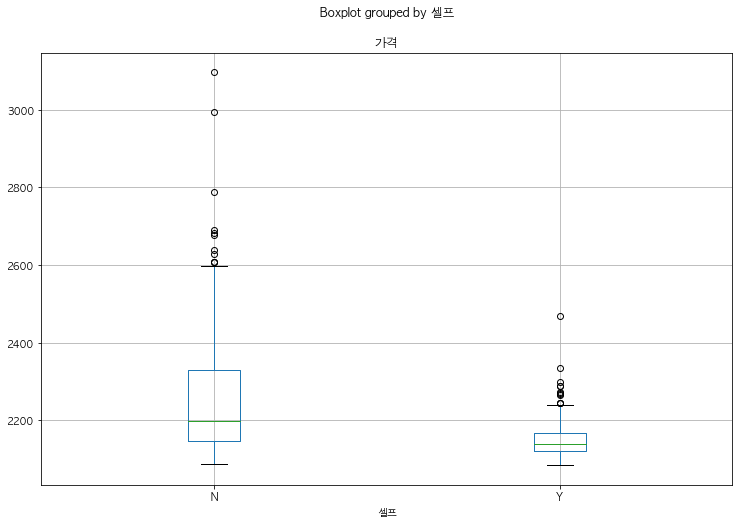

In [62]:
# boxplot 그리기
stations.boxplot(column="가격", by="셀프", figsize=(12,8))
plt.show()

In [63]:
import seaborn as sns

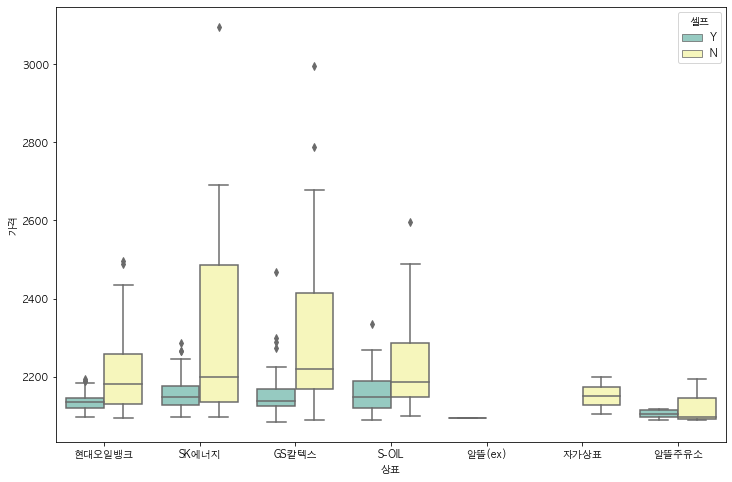

In [71]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
  x="상표",
  y = "가격",
  hue = "셀프",
  data=stations,
  palette="Set3"
)
plt.show()

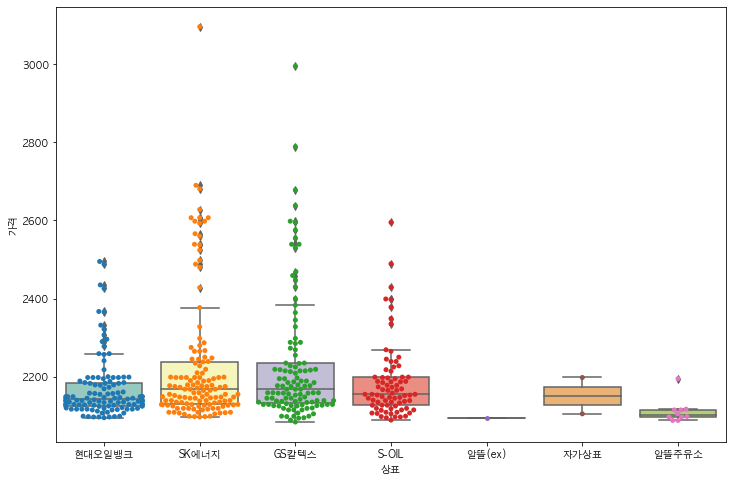

In [73]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
  x = "상표",
  y = "가격",
  # hue = "셀프",
  data=stations,
  palette="Set3"
)
sns.swarmplot(
    x = "상표",
    y = "가격",
    # hue = "셀프",
    data=stations,
)
plt.show()

In [74]:
stations[stations.상표 == "자가상표"]

,Oil_store,주소,가격,셀프,상표,구
98,정호주유소,서울 성동구 고산자로 307 (마장동),2105,N,자가상표,성동구
262,코끼리주유소,서울 은평구 서오릉로 41 (녹번동),2198,N,자가상표,은평구


---
# 시웅님의 부재

In [76]:
# 가격이 높은 순으로 정렬
stations.sort_values("가격", ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [77]:
# 가격이 낮은 순으로 정렬
stations.sort_values("가격").head(10)

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [78]:
# 가장 비싼 가격과 싼 가격 차이
stations.가격.max() - stations.가격.min()

1012

In [96]:
# 구별 가격 평균
stations.groupby("구").mean().sort_values("가격", ascending=False).head(10)
# 쌤 방식
gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], aggfunc="mean")
gu_data.sort_values(by="가격", ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


### 지도표시

In [97]:
import json
import folium

In [100]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(
  location=[37.5502, 126.982],
  zoom_start=10.5,
  tiles="Stamen Toner"
)

folium.Choropleth(
  geo_data=geo_str,
  data=gu_data,
  columns=[gu_data.index, "가격"],
  fill_color="PuRd",
  key_on="feature.id"
).add_to(map)


map

In [101]:
# 가격이 제일 비싼 Top10 구성
oil_price_top10 = stations.sort_values(by="가격", ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [102]:
# 가격이 제일 비싼 Top10 구성
oil_price_bottom10 = stations.sort_values(by="가격", ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [107]:
oil_price_top10.주소.iloc[0]

'서울 중구 통일로 30'

In [114]:
oil_price_top10[["lat", "lng"]] = 0.0
oil_price_bottom10[["lat", "lng"]] = 0.0

In [110]:
import urllib.request

client_id = ""
client_secret = ""

In [ ]:
for i in range(10):
  encText = urllib.parse.quote(oil_price_top10.주소.iloc[i])
  url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
  request = urllib.request.Request(url)
  request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
  request.add_header("X-NCP-APIGW-API-KEY",client_secret)

  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if rescode == 200:
    response_body = response.read()
    enText = response_body.decode()
  else:
    print("Error Code:" + rescode)

  import json
  data1 = json.loads(enText)
  oil_price_top10["lng"] = data1['addresses'][0]['x']
  lat = data1['addresses'][0]['y']

